<a href="https://colab.research.google.com/github/Nungdoo/deep-learning-study/blob/main/exercise09_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 텐서플로로 순환 신경망 만들기

텐서플로에서 가장 기본적인 순환층 : SimpleRNN

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN

model = Sequential()

# 사용할 셀의 개수 지정 : 32
# 인풋 차원 지정 (타임 스텝의 길이 100, 원-핫 인코딩 크기 100)
model.add(SimpleRNN(32, input_shape=(100, 100)))

# 이진 분류이므로 하나의 dense층 추가
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 32)                4256      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 4,289
Trainable params: 4,289
Non-trainable params: 0
_________________________________________________________________


In [2]:
# 데이터 준비

import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.utils import to_categorical

(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=100)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]

word_to_index = imdb.get_word_index()
index_to_word = {word_to_index[k]: k for k in word_to_index}

for w in x_train_all[0]:
  print(index_to_word[w-3], end=' ')

np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

x_train_onehot = to_categorical(x_train_seq)
x_val_onehot = to_categorical(x_val_seq)

1654784/1641221 [==============================] - 0s 0us/step
film just story really they you just there an from so there film film were great just so much film would really at so you what they if you at film have been good also they were just are out because them all up are film but are be what they have don't you story so because all all 

In [3]:
# 확률적 경사 하강법 sgd
# 이진 분류 손실 함수 binary_crossentropy

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(x_train_onehot, y_train, epochs=20, batch_size=32, validation_data=(x_val_onehot, y_val))

Epoch 1/20
625/625 [==============================] - 12s 18ms/step - loss: 0.7051 - accuracy: 0.4962 - val_loss: 0.6974 - val_accuracy: 0.5040
Epoch 2/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6952 - accuracy: 0.5082 - val_loss: 0.6952 - val_accuracy: 0.5038
Epoch 3/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6930 - accuracy: 0.5148 - val_loss: 0.6938 - val_accuracy: 0.5116
Epoch 4/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6917 - accuracy: 0.5202 - val_loss: 0.6917 - val_accuracy: 0.5220
Epoch 5/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6908 - accuracy: 0.5274 - val_loss: 0.6916 - val_accuracy: 0.5180
Epoch 6/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6897 - accuracy: 0.5350 - val_loss: 0.6914 - val_accuracy: 0.5202
Epoch 7/20
625/625 [==============================] - 11s 17ms/step - loss: 0.6882 - accuracy: 0.5380 - val_loss: 0.6888 - val_accuracy:

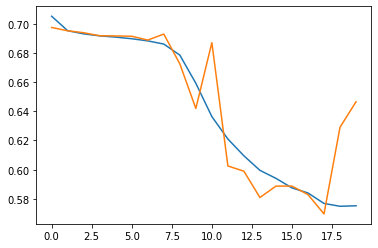

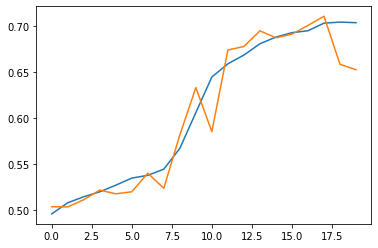

In [4]:
import matplotlib.pyplot as plt

# 손실 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# 정확도 그래프 그리기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

In [6]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)

0.6525999903678894


# 임베딩 층으로 성능 높이기

텍스트 데이터를 원-핫 인코딩으로 전처리함으로 오는 문제들
- 입력 데이터 크기와 사용할 수 있는 영단어의 수가 제한됨
- 단어 사이에는 관련이 전혀 없다는 가정이 전제되어야 함

단어 임베딩을 통해 해결
- 단어를 고정된 길이의 실수 벡터로 임베딩
- 단어 사이의 연관성을 숫자들의 차이를 통해 예상 가능
- 훈련하면서 단어 임베딩도 훈련되므로 훈련이 진행될수록 단어의 연관 관계를 더 정확하게 찾을 수 있음

In [7]:
from tensorflow.keras.layers import Embedding

# num_words 1000개로 수정
(x_train_all, y_train_all), (x_test, y_test) = imdb.load_data(skip_top=20, num_words=1000)

for i in range(len(x_train_all)):
  x_train_all[i] = [w for w in x_train_all[i] if w > 2]


np.random.seed(42)
random_index = np.random.permutation(25000)

x_train = x_train_all[random_index[:20000]]
y_train = y_train_all[random_index[:20000]]
x_val = x_train_all[random_index[20000:]]
y_val = y_train_all[random_index[20000:]]

maxlen = 100
x_train_seq = sequence.pad_sequences(x_train, maxlen=maxlen)
x_val_seq = sequence.pad_sequences(x_val, maxlen=maxlen)

In [8]:
model_ebd = Sequential()

# 단어 개수 : 1000
# 입력 벡터의 길이 : 32 (원-핫 인코딩은 100이였음)
model_ebd.add(Embedding(1000, 32))

# 셀의 개수도 8개로 줄임
model_ebd.add(SimpleRNN(8))
model_ebd.add(Dense(1, activation='sigmoid'))

model_ebd.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          32000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 8)                 328       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 32,337
Trainable params: 32,337
Non-trainable params: 0
_________________________________________________________________


In [9]:
# adam 최적화 알고리즘
model_ebd.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model_ebd.fit(x_train_seq, y_train, epochs=10, batch_size=32, validation_data=(x_val_seq, y_val))

Epoch 1/10
625/625 [==============================] - 12s 18ms/step - loss: 0.5032 - accuracy: 0.7700 - val_loss: 0.4439 - val_accuracy: 0.8032
Epoch 2/10
625/625 [==============================] - 12s 18ms/step - loss: 0.3858 - accuracy: 0.8383 - val_loss: 0.4205 - val_accuracy: 0.8172
Epoch 3/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3480 - accuracy: 0.8566 - val_loss: 0.4178 - val_accuracy: 0.8144
Epoch 4/10
625/625 [==============================] - 11s 18ms/step - loss: 0.3147 - accuracy: 0.8725 - val_loss: 0.4189 - val_accuracy: 0.8234
Epoch 5/10
625/625 [==============================] - 11s 18ms/step - loss: 0.2868 - accuracy: 0.8852 - val_loss: 0.4228 - val_accuracy: 0.8208
Epoch 6/10
625/625 [==============================] - 13s 20ms/step - loss: 0.2608 - accuracy: 0.8980 - val_loss: 0.4590 - val_accuracy: 0.8060
Epoch 7/10
625/625 [==============================] - 14s 23ms/step - loss: 0.2487 - accuracy: 0.9033 - val_loss: 0.4866 - val_accuracy:

In [ ]:
# 손실 그래프 그리기
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

# 정확도 그래프 그리기
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()

단어 임베딩은 효율적이고 성능이 뛰어나기 때문에

순환 신경망에서 텍스트 처리를 할 때 임베딩층이 기본으로 사용됨

In [ ]:
loss, accuracy = model.evaluate(x_val_onehot, y_val, verbose=0)
print(accuracy)